# Creation of Nodes & Edges for Network

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time

## Read in data

In [2]:
dunkin = pd.read_csv("../Data/dunkin.csv")
starbucks = pd.read_csv("../Data/starbucks.csv")

In [3]:
print(dunkin.shape)
dunkin.head()

(7677, 25)


,Unnamed: 0,id,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,in_reply_to_user_id,...,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,num_words,negative,neutral,positive,sentiment_score,sentiment
0,0,D1,2022-07-12 21:14:46,dunkin donut erwin tn mix frozen coffe ham bre...,NaN,[],[],0,0,NaN,...,2,11,False,12,29,0.121,0.879,0.000,-0.4019,negative
1,1,D2,2022-07-12 21:13:49,dunkin realli thing w snackin bacon wtf,NaN,[],[],0,0,NaN,...,2174,31581,False,72906,7,0.388,0.612,0.000,-0.5859,negative
2,2,D3,2022-07-12 21:11:55,dunkin gotta though lol,NaN,[54966102],['Sherly_Francois'],0,0,5.496610e+07,...,3048,12989,False,45333,4,0.000,0.517,0.483,0.4215,positive
3,3,D4,2022-07-12 21:10:31,dunkin mobil dunkin mobil commerci,NaN,[],[],0,0,NaN,...,765,247,False,45338,5,0.000,1.000,0.000,0.0000,neutral
4,4,D5,2022-07-12 21:08:12,newish place long pond next bryant stanton rig...,NaN,[1677218400],['PatrickGerald70'],0,0,1.677218e+09,...,379,31939,False,27597,12,0.000,0.894,0.106,0.0772,positive


In [4]:
print(starbucks.shape)
starbucks.head()

(7877, 25)


,Unnamed: 0,id,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,in_reply_to_user_id,...,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,num_words,negative,neutral,positive,sentiment_score,sentiment
0,0,S1,2022-07-12 20:26:46,starbuck put whole starbussi shaken espresso c...,NaN,[],[],0,0,NaN,...,1147,72821,False,9319,10,0.126,0.874,0.000,-0.0772,negative
1,1,S2,2022-07-12 20:26:43,dear ex bestfriend want thank u chang liter en...,NaN,[],[],0,0,NaN,...,4,222,False,423,26,0.130,0.434,0.436,0.8750,positive
2,2,S3,2022-07-12 20:26:42,got half ice starbuck drink today,NaN,[],[],0,0,NaN,...,104,1128,False,6533,6,0.000,1.000,0.000,0.0000,neutral
3,5,S4,2022-07-12 20:26:29,tri hard destroy starbuck bathroom damn dragon...,NaN,[],[],0,0,NaN,...,78,2275,False,1356,9,0.559,0.441,0.000,-0.7650,negative
4,6,S5,2022-07-12 20:26:17,woke compani long donat democrat caus amp supp...,DemocratCrimeWave BlueCities Crime Starbucks E...,[],[],0,0,NaN,...,207,266,False,2196,18,0.261,0.459,0.279,-0.1280,negative


## Merge & Format data

#### Add brand column

In [5]:
dunkin['brand'] = 'dunkin'
starbucks['brand'] = 'starbucks'

#### Merge datasets

In [6]:
combined = pd.concat([starbucks, dunkin], ignore_index=True)
combined.reset_index(inplace=True)
combined.shape

(15554, 27)

#### Each tweet's text into list of words

In [7]:
combined['text_split'] = combined['text'].str.split(' ')
print(combined['text_split'][0])

['starbuck', 'put', 'whole', 'starbussi', 'shaken', 'espresso', 'capit', 'realli', 'pop', 'one']


#### Remove tweets with no words

In [8]:
orig = len(combined)
combined = combined[combined['text_split'].notna()]
combined.reset_index(inplace=True)
print("Number of Removed Tweets: ", orig-len(combined))

Number of Removed Tweets:  0


#### Indicate if tweet was posted by "influencer" or not

Examine distribution of user follower counts across all tweets

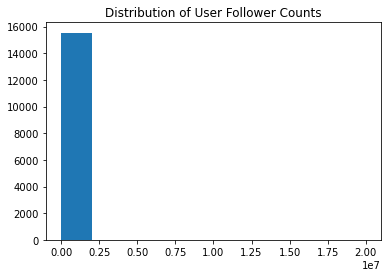

In [9]:
plt.hist(x=combined['user_followers_count'])
plt.title('Distribution of User Follower Counts')
plt.show()

In [10]:
combined['user_followers_count'].describe()

count    1.555400e+04
mean     8.913709e+03
std      1.994048e+05
min      0.000000e+00
25%      1.140000e+02
50%      3.790000e+02
75%      1.176000e+03
max      1.999756e+07
Name: user_followers_count, dtype: float64

Make influencer cutoff to get the minimum number of followers of top 10% of users in tweet collection

In [11]:
influencer_cutoff = combined['user_followers_count'].quantile(0.9)
print(influencer_cutoff)

3623.4000000000087


Assign 'infuencer' indicator to those in top amount of followers

In [12]:
combined['influencer'] = ['Yes' if x>influencer_cutoff else 'No' for x in combined['user_followers_count']]
combined[['user_followers_count', 'influencer']].head(20)

,user_followers_count,influencer
0,1147,No
1,4,No
2,104,No
3,78,No
4,207,No
5,30486,Yes
6,111,No
7,171,No
8,771,No
9,252,No


## Make nodes & edges

#### Add all nodes and add edges between nodes with at least 3 similar words

Make edge attributes of:
 - List of common words between 2 tweets
 - Number of common words between 2 tweets


In [19]:
start_time = time.time()
G = nx.Graph()
for i in range(len(combined)):
    for j in range(i,len(combined)):
        if i != j:
            count = 0
            common_words = []
            for word in set(combined['text_split'][i]):
                if word in set(combined['text_split'][j]):
                    count += 1
                    common_words.append(word)
            if count >= 3:
                G.add_edge(combined['id'][i], combined['id'][j], common_words=common_words, count_of_words=count)
    if combined['id'][i] not in G:
         G.add_node(combined['id'][i])
    if i % 1000 == 0:
        print("i: ", i)
        print("time elapsed: ", round((time.time()-start_time)/60,2), " mins")
        print("num nodes: ", len(G.nodes))
        print("num edges: ", len(G.edges), '\n')
print("~~~~~~ Complete ~~~~~~")
print("Total Time: ", round((time.time()-start_time)/60,2), " mins")
print("Number of Nodes: ", len(G.nodes))
print("Number of Edges: ", len(G.edges))

i:  0
time elapsed:  0.01  mins
num nodes:  44
num edges:  43 

i:  1000
time elapsed:  11.2  mins
num nodes:  9861
num edges:  218939 

i:  2000
time elapsed:  21.37  mins
num nodes:  11332
num edges:  387653 

i:  3000
time elapsed:  31.0  mins
num nodes:  11826
num edges:  532294 

i:  4000
time elapsed:  39.63  mins
num nodes:  12281
num edges:  652635 

i:  5000
time elapsed:  47.64  mins
num nodes:  12593
num edges:  748440 

i:  6000
time elapsed:  55.25  mins
num nodes:  12958
num edges:  812565 

i:  7000
time elapsed:  62.25  mins
num nodes:  13213
num edges:  862948 

i:  8000
time elapsed:  68.4  mins
num nodes:  13834
num edges:  923051 

i:  9000
time elapsed:  73.47  mins
num nodes:  14621
num edges:  1112450 

i:  10000
time elapsed:  77.95  mins
num nodes:  14923
num edges:  1257954 

i:  11000
time elapsed:  81.33  mins
num nodes:  15085
num edges:  1378789 

i:  12000
time elapsed:  84.16  mins
num nodes:  15197
num edges:  1476359 

i:  13000
time elapsed:  86.38  m

#### Add node attributes

Node attributes of:
 - Brand (options: starbucks or dunkin)
 - If influencer (options: Yes or No)
 - Sentiment (options: positive, neutral, or negative)
 - User follower count (number)
 - Tweet retweet count (number)
 - Tweet favorite count (number)

In [20]:
node_names = combined['id']
nx.set_node_attributes(G, dict(zip(node_names, combined['brand'])), name="brand")
nx.set_node_attributes(G, dict(zip(node_names, combined['influencer'])), name="influencer_status")
nx.set_node_attributes(G, dict(zip(node_names, combined['sentiment'])), name="sentiment")
nx.set_node_attributes(G, dict(zip(node_names, combined['user_followers_count'])), name="user_followers_count")
nx.set_node_attributes(G, dict(zip(node_names, combined['retweet_count'])), name="retweet_count")
nx.set_node_attributes(G, dict(zip(node_names, combined['favorite_count'])), name="favorite_count")

#### Remove singletons

In [21]:
G.remove_nodes_from(list(nx.isolates(G)))

In [22]:
print("Number of Nodes: ", len(G.nodes))
print("Number of Edges: ", len(G.edges))

Number of Nodes:  14611
Number of Edges:  1635117


#### Save data to gml file

In [23]:
nx.write_gml(G, "../Data/G_data.gml")

## Get network of sampled data

#### Get sample of merged/formatted dataset for testing

In [16]:
combined_sampled = pd.concat([combined[combined.brand == "starbucks"].sample(100), 
                              combined[combined.brand == "dunkin"].sample(100)],
                            ignore_index=True)
combined_sampled.shape

(200, 30)

#### Make network

In [17]:
# Instantiate graph
G_small = nx.Graph()

# Add all nodes with edges
for i in range(len(combined_sampled)):
    for j in range(i,len(combined_sampled)):
        if i != j:
            count = 0
            common_words = []
            for word in set(combined_sampled['text_split'][i]):
                if word in set(combined_sampled['text_split'][j]):
                    count += 1
                    common_words.append(word)
            if count >= 3:
                G_small.add_edge(combined_sampled['id'][i], combined_sampled['id'][j], common_words=common_words, count_of_words=count)
    if combined_sampled['id'][i] not in G_small:
         G_small.add_node(combined_sampled['id'][i])

# Add node attributes
node_names_small = combined_sampled['id']
nx.set_node_attributes(G_small, dict(zip(node_names_small, combined_sampled['brand'])), name="brand")
nx.set_node_attributes(G_small, dict(zip(node_names_small, combined_sampled['influencer'])), name="influencer_status")
nx.set_node_attributes(G_small, dict(zip(node_names_small, combined_sampled['sentiment'])), name="sentiment")
nx.set_node_attributes(G_small, dict(zip(node_names_small, combined_sampled['user_followers_count'])), name="user_followers_count")
nx.set_node_attributes(G_small, dict(zip(node_names_small, combined_sampled['retweet_count'])), name="retweet_count")
nx.set_node_attributes(G_small, dict(zip(node_names_small, combined_sampled['favorite_count'])), name="favorite_count")

# Remove singletons
G_small.remove_nodes_from(list(nx.isolates(G_small)))

# Print size
print("Number of Nodes: ", len(G_small.nodes))
print("Number of Edges: ", len(G_small.edges))

Number of Nodes:  126
Number of Edges:  286


#### Save data to gml file

In [18]:
nx.write_gml(G_small, "../Data/G_data_sampled.gml")